# **Loan Prediction Based on Customers Behaviour**

## **Domain Project**

##### Dalam industri keuangan, khususnya pada perusahaan pemberi pinjaman, manajemen risiko kredit adalah aspek yang sangat penting. Salah satu risiko utama yang dihadapi oleh perusahaan pemberi pinjaman adalah risiko kredit, yaitu kemungkinan bahwa peminjam gagal membayar pinjamannya. Ketika seorang peminjam gagal membayar (default), ini tidak hanya berdampak buruk pada keuangan perusahaan, tetapi juga dapat mengganggu proses bisnis dan menurunkan kepuasan pelanggan.

##### Proses manual dalam menilai dan menyetujui aplikasi pinjaman sering kali memakan waktu yang lama dan tidak efisien. Hal ini dapat mengakibatkan penundaan dalam memberikan keputusan pinjaman kepada pelanggan, yang pada gilirannya dapat memengaruhi kepuasan pelanggan dan memperlambat aliran kas perusahaan.

###### Untuk mengatasi tantangan ini, diperlukan suatu sistem yang dapat memprediksi dengan tepat dan cepat peminjam mana yang berpotensi gagal membayar dan peminjam mana yang layak untuk diberikan pinjaman. Dengan demikian, perusahaan dapat meningkatkan tingkat pengembalian pinjaman (repayment rate) dan mengoptimalkan proses persetujuan pinjaman.

## **Busines Understanding**

##### **Problem Statement**

###### 1. Bagaimana memahami perilaku dan preferensi pelanggan yang good borrower (kecil probabilitas default) dan bad borrower (besar probabilitas default)?
###### 2. Bagaimana mengurangi risiko kredit akibat tingginya jumlah peminjam yang gagal bayar?
###### 3. Bagaimana mempercepat proses penilaian dan persetujuan pinjaman untuk meningkatkan efisiensi operasional dan kepuasan pelanggan?

###**Tujuan Project**

###### 1.Memahami Perilaku Pelanggan:

- Mengembangkan model prediktif untuk mengidentifikasi good borrowers dan bad borrowers melalui analisis data pelanggan.

##### 2. Mengurangi Risiko Kredit:

- Mengurangi tingkat gagal bayar dengan meningkatkan angka repayment rate sebesar 5% atau mencapai 95% dalam tiga bulan melalui penilaian risiko yang lebih akurat.

##### 3. Meningkatkan Efisiensi dan Kepuasan Pelanggan:

- Mengotomatisasi proses penilaian kredit, mengurangi waktu persetujuan pinjaman dari 7 hari menjadi kurang dari 24 jam.
- Meningkatkan kepuasan pelanggan sebesar 10% dalam enam bulan setelah implementasi.

## **Data Understanding**

Data yang Anda gunakan pada proyek kali ini adalah "[Loan Prediction Based on Customers Behaviour](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv])" yang diunduh dari Kaggle API. Untuk tahap training, dapat dilakukan hanya dari file "Training Data.csv" yang akan displit kembali untuk menjadi data train dan test pada tahap modelling. Selain itu, dataset ini juga cukup bersih sehingga tidak terlalu banyak memerlukan proses data cleaning.

Dataset ini memiliki 252000 baris dengan 13 fitur, yang terdiri fitur non-numerik seperti Married/Single, House_Ownership, Car_Ownership, Profession, CITY, dan STATE, serta fitur numerik seperti Id, Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, dan Risk_Flag. Fitur-fitur ini adalah fitur yang akan Anda gunakan dalam menemukan pola pada data untuk memprediksi fitur target yaitu Risk_Flag.

## **Import Data**

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [129]:
df=pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## **Exploration Data Analysis (EDA)**

**Features Description**

Berdasarkan informasi dari Kaggle, fitur-fitur pada Travel Insurance dataset adalah sebagai berikut:

- **id** - Id of user
- **income** - Income of the user
- **age** - Age of the user
- **experience** - Professional experience of the user in years
- **married/single** - Whether married or single
- **house_ownership** - Owned or rented or neither
- **car_ownership** - Does the person own a car
- **profession** - Profession
- **city** - City of residence
- **state** - State of residence
- **current_job** - Years of experience in the current job
- **current_house_yrs** - Number of years in the current residence
- **risk_flag** - Defaulted on a loan

In [130]:
df.columns = [x.lower() for x in df.columns.to_list()]
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [131]:
df['risk_flag'].value_counts()

,count
risk_flag,
0,221004
1,30996


In [132]:
df.dtypes

,0
id,int64
income,int64
age,int64
experience,int64
married/single,object
house_ownership,object
car_ownership,object
profession,object
city,object
state,object


Setiap fitur memiliki tipe data yang sesuai. Namun, untuk keperluan pemodelan dengan machine learning, fitur-fitur kategorikal akan dikonversi menjadi fitur numerik.

## **Check Missing Value and Duplicated Data**

In [133]:
df.isnull().sum()

,0
id,0
income,0
age,0
experience,0
married/single,0
house_ownership,0
car_ownership,0
profession,0
city,0
state,0


Tidak terdapat data yang hilang (missing values), sehingga tidak perlu dilakukan drop missing value ataupun imputasi dengan nilai lain seperti media, mean atau lainnya.

In [134]:
df.duplicated().sum()

0

Tidak terdapat data duplikat

## **Descriptive Statistics**

In [135]:
def currency_formattter(x, pos):
  if x >= 1e6:
    return '${:1.1f}M'.format(x*1e-6)
  if x >= 1e3:
    return '${:1.1f}K'.format(x*1e-3)
  else:
    return '${:1.0f}'.format(x)

formatter = plt.FuncFormatter(currency_formattter)

In [136]:
df.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00
mean,126000.50,4997116.67,49.95,10.08,6.33,12.00,0.12
std,72746.28,2878311.01,17.06,6.00,3.65,1.40,0.33
min,1.00,10310.00,21.00,0.00,0.00,10.00,0.00
25%,63000.75,2503015.00,35.00,5.00,3.00,11.00,0.00
50%,126000.50,5000694.50,50.00,10.00,6.00,12.00,0.00
75%,189000.25,7477502.00,65.00,15.00,9.00,13.00,0.00
max,252000.00,9999938.00,79.00,20.00,14.00,14.00,1.00


Dari hasil fungsi .describe(), tidak ditemukan informasi yang anomali atau ambigu. Berikut adalah informasi yang diperoleh:

- Jumlah data (baris atau record) adalah 252000 baris data.
- Pendapatan(income): Rata-rata pendapatan pelanggan adalah Rs5.000.000 dengan rentang Rs10.000an - Rs9.900.000an serta median yang tidak jauh berbeda dengan rata-rata tersebut sehingga mengindikasikan tidak adanya outlier pada data ini.
- Usia (age): Rata-rata usia pelanggan adalah sekitar 49 tahun, dengan rentang usia antara 21 hingga 79 tahun.
- Pengalaman (experience): Rentang pengalaman yang dimiliki oleh pelanggan adalah 0 - 20 tahun dengan rata-rata 10 tahun.
- Lama di pekerjaan saat ini (current_job_yrs): Rentang dalam pengalaman kerja saat ini adalah 0 - 14 tahun dengan rata-rata 6 tahun.
- Lama di rumah saat ini (current_house_yrs): Pelanggan cenderung tinggal di rumah mereka selama 10 hingga 14 tahun.
- Gagal membayar pinjaman (risk_flag): Terdapat dua nilai yaitu 0 untuk pelanggan yang tidak mengalami defaul sedangkan 1 untuk pelanggan yang mengalami atau pernah default.

In [137]:
df.describe(include='object')

,married/single,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


- Status (married/single): Mayoritas pelanggan adalah masih lajang (single)
- Kepemilikan rumah (house_ownership): Mayoritas pelanggan memiliki rumah dalam status sewa (ranted)
- Kepemilikan mobil (car_ownership): Mayoritas pelanggan tidak memiliki mobil
- Pekerjaan (profession): Pekerjaan yang paling umum di antara pelanggan adalah fisikawan.
- Kota (city): Mayoritas pelanggan berasal dari kota Vijayanagaram.
- Wilayah (state): Mayoritas pelanggan berasal dari wilayah Uttar Pradesh.

#**Data Visualization - Numerical Features**

**Income Features**

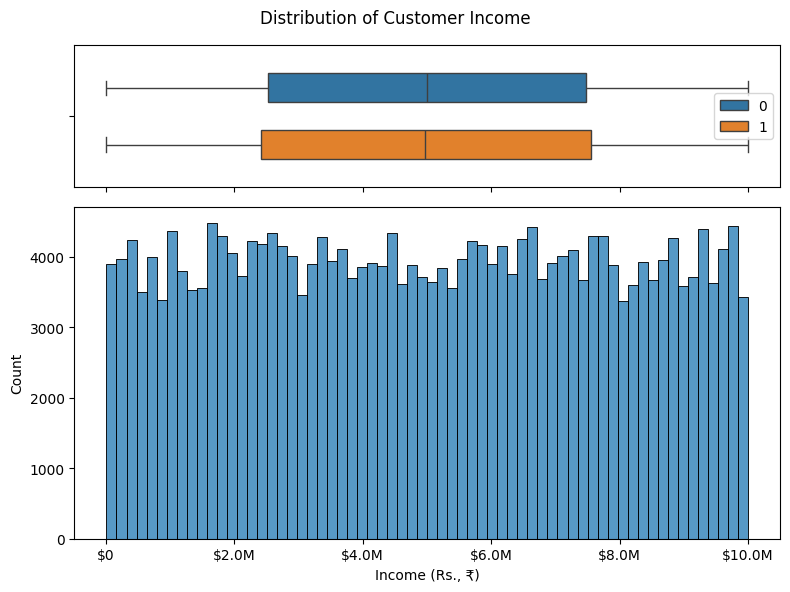

In [138]:
fig, ax = plt.subplots(nrows= 2, ncols= 1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='income', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='income', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Income (Rs., ₹)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Income')
plt.tight_layout()
plt.show()


Distribusi pendapatan pelanggan terdistribusi merata dengan pendapatan tertinggi mencapai Rs10.000.000. Selain itu, IQR dari pendapatan pelanggan yang mengalami default lebih besar daripada yang tidak mengalami default, menunjukkan variasi yang lebih besar pada pendapatan pelanggan yang mengalami default. Penting untuk dicatat bahwa dalam distribusi ini tidak ada nilai outlier.

**Age Features**

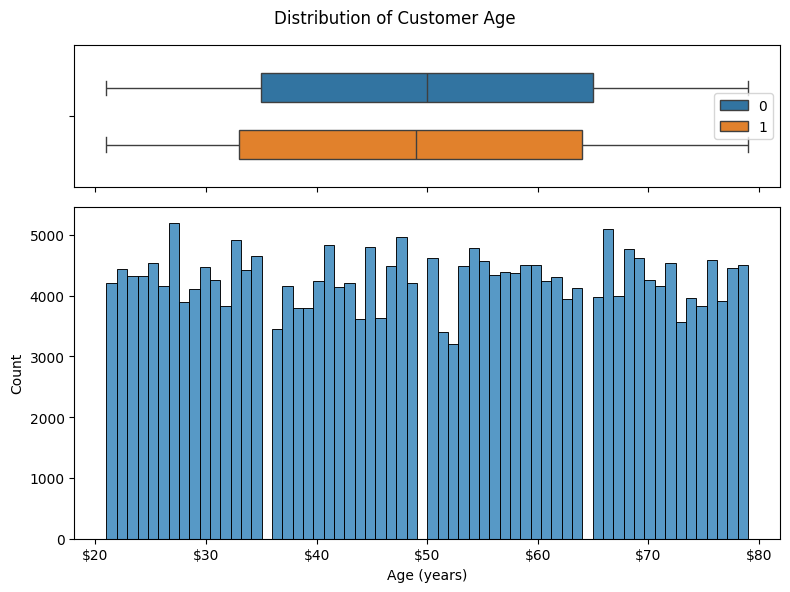

In [139]:
fig, ax = plt.subplots(nrows= 2, ncols= 1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='age', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='age', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Age (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Age')
plt.tight_layout()
plt.show()


Distribusi usia pelanggan antara 20 sampai dengan 80. Pelanggan yang pernah mengalami default cenderung memiliki usia yang lebih muda dibandingkan dengan yang tidak pernah mengalami default, seperti yang ditujunjukkan oleh nilai Q1, Q2, dan Q3 yang lebih kecil.

**Experience Features**

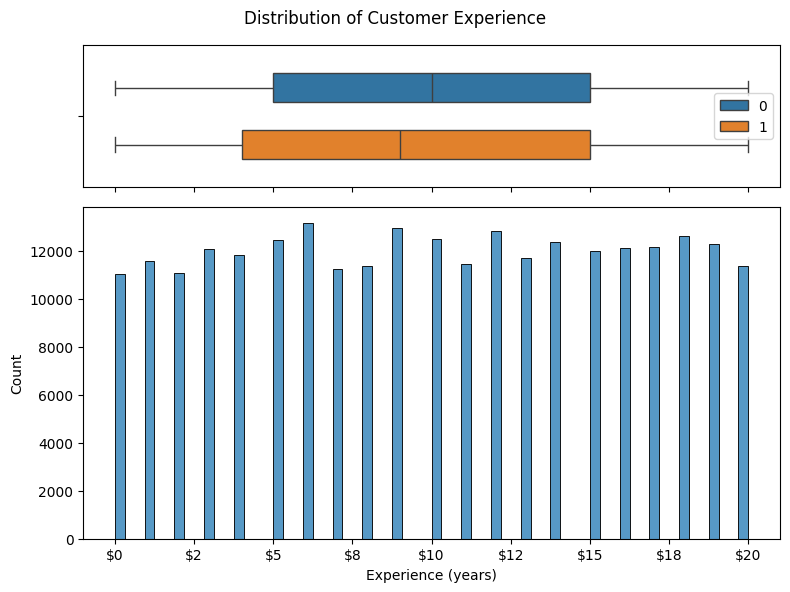

In [140]:
fig, ax = plt.subplots(nrows= 2, ncols= 1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='experience', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='experience', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Experience (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Experience')
plt.tight_layout()
plt.show()

Distribusi dari pengalaman kerja pelanggan merata dalam rentang 0 hingga 20 tahun tanpa ada outliers. Pelanggan yang pernah mengalami default cenderung memiliki pengalaman kerja yang lebih baru dibandingkan dengan pelanggan yang tidak pernah mengalami default, yang ditunjukkan oleh nilai Q1 dan Q2 yang lebih kecil.

**Current Job Experiences Features**

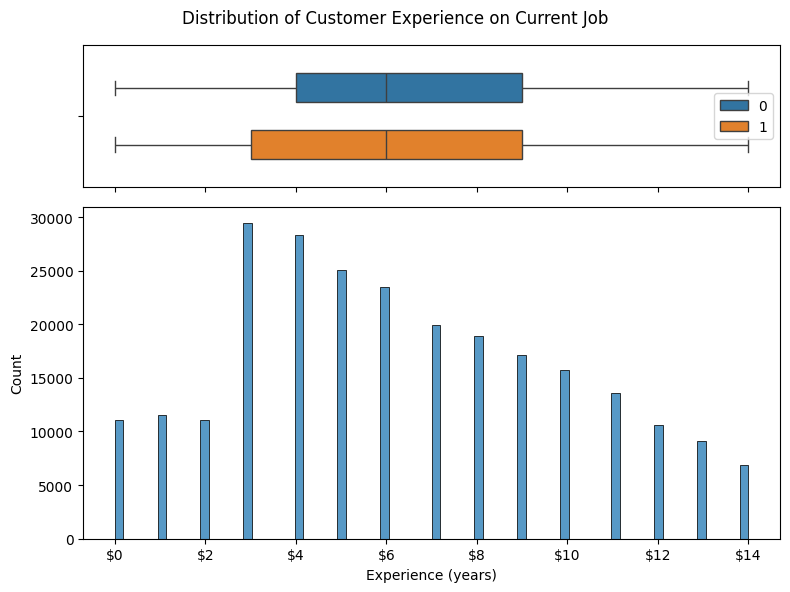

In [141]:
fig, ax = plt.subplots(nrows= 2, ncols= 1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='current_job_yrs', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='current_job_yrs', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Experience (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Customer Experience on Current Job')
plt.tight_layout()
plt.show()

Mayoritas pelanggan memiliki pengalaman kerja saat ini sekitar 3 hingga 5 tahun, dan tidak ada outlier dalam data. Pelanggan yang tidak pernah mengalami default cenderung memiliki pengalaman kerja saat ini yang lebih lama dibandingkan dengan pelanggan yang pernah mengalami default, yang ditunjukkan oleh nilai Q1 yang lebih besar.

**Current House Features**

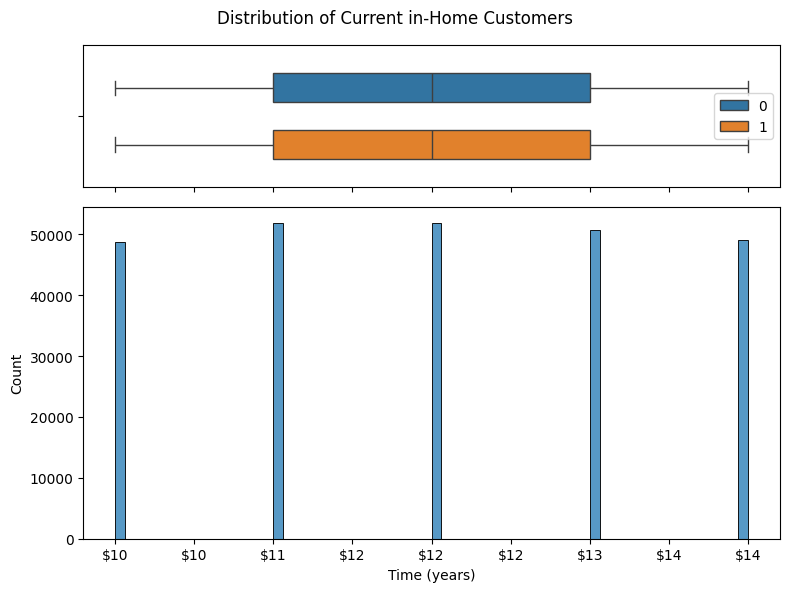

In [142]:
fig, ax = plt.subplots(nrows= 2, ncols= 1,
                       sharex=True, height_ratios=[0.3, 0.7],
                       figsize=(8,6))

sns.boxplot(x='current_house_yrs', hue='risk_flag', width=0.8, gap=0.5, data=df, ax=ax[0])
sns.histplot(x='current_house_yrs', data=df, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel('Time (years)')

ax[0].legend(loc='center right')
plt.suptitle('Distribution of Current in-Home Customers')
plt.tight_layout()
plt.show()

Untuk distribusi lama pelanggan tinggal di rumah saat ini memiliki rentang 10 - 14 tahun dan tersebar secara merata. Selain itu, berdasarkan boxplot tidak ditemukan outlier serta perbedaan antara pelanggan yang default dan non-default terhadap lama tinggal di rumah saat ini.

## **Data Visualizatipn - Categorical Features**

**Married/Single Features**

married/single
single     226272
married     25728
Name: count, dtype: int64 



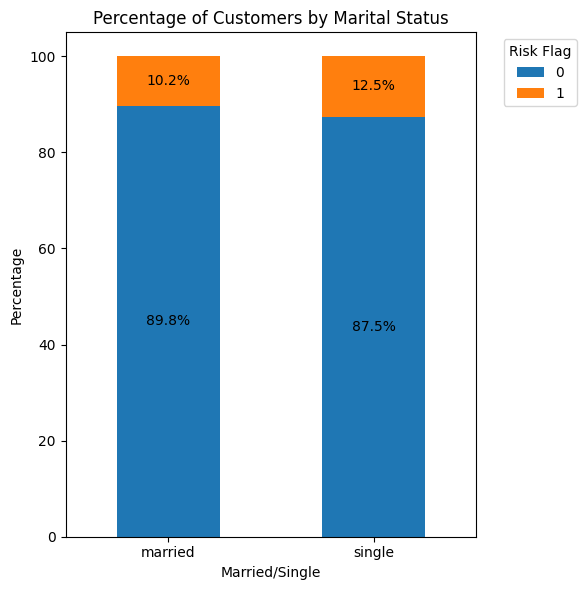

In [143]:
print(df['married/single'].value_counts(), '\n')

grouped_df = df.groupby('married/single')['risk_flag'].value_counts().unstack()
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

ax = percentage_df.plot(kind='bar', stacked=True, figsize=(6,6))

plt.xlabel('Married/Single')
plt.ylabel('Percentage')
plt.title('Percentage of Customers by Marital Status')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.legend(title='Risk Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mayoritas pelanggan berstatus lajang (single). Selain itu, jika dilihat dari proporsi status menikah/lajang untuk masing-masing kategori default atau non-default, diperoleh bahwa pelanggan yang telah menikah (married) memiliki kemungkinan non-default lebih besar dibandingkan pelanggan yang masih lajang (single).

**House Ownership Features**

house_ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64 



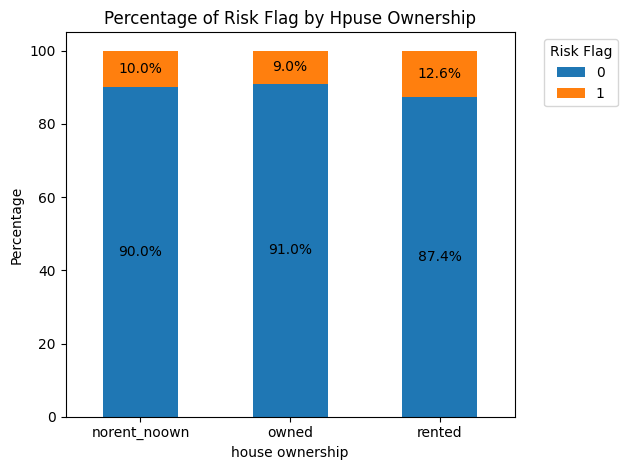

In [144]:
print(df['house_ownership'].value_counts(), '\n')

grouped_df = df.groupby('house_ownership')['risk_flag'].value_counts().unstack()
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

ax = percentage_df.plot(kind='bar', stacked=True)

plt.xlabel('house ownership')
plt.ylabel('Percentage')
plt.title('Percentage of Risk Flag by Hpuse Ownership')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.legend(title='Risk Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mayoritas pelanggan memiliki rumah dengan status sewa (rented). Selain itu, jika dilihat dari proporsi status kepemilikan rumah untuk masing-masing kategori default atau non-default, diperoleh bahwa pelanggan yang memiliki rumah dengan status kepemilikan (owned) mempunyai kemungkinan non-default lebih besar dibandingkan pelanggan yang tidak memiliki rumah (norent_noown) dan sewa rumah (rented).

**Car Ownership Features**

car_ownership
no     176000
yes     76000
Name: count, dtype: int64 



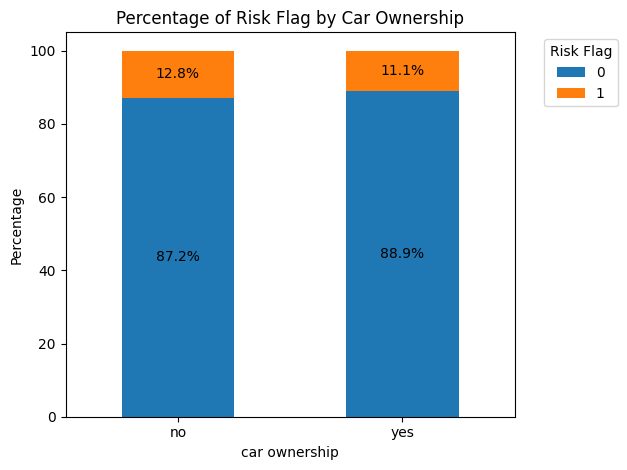

In [145]:
print(df['car_ownership'].value_counts(), '\n')

grouped_df = df.groupby('car_ownership')['risk_flag'].value_counts().unstack()
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

ax = percentage_df.plot(kind='bar', stacked=True)

plt.xlabel('car ownership')
plt.ylabel('Percentage')
plt.title('Percentage of Risk Flag by Car Ownership')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.legend(title='Risk Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Mayoritas pelanggan tidak memiliki mobil. Selain itu, jika dilihat dari proporsi kepemilikan mobil untuk masing-masing kategori default atau non-default, diperoleh bahwa pelanggan yang memiliki mobil mempunyai kemungkinan non-default lebih besar dibandingkan pelanggan yang tidak memiliki mobil.

**Profession Features**

profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

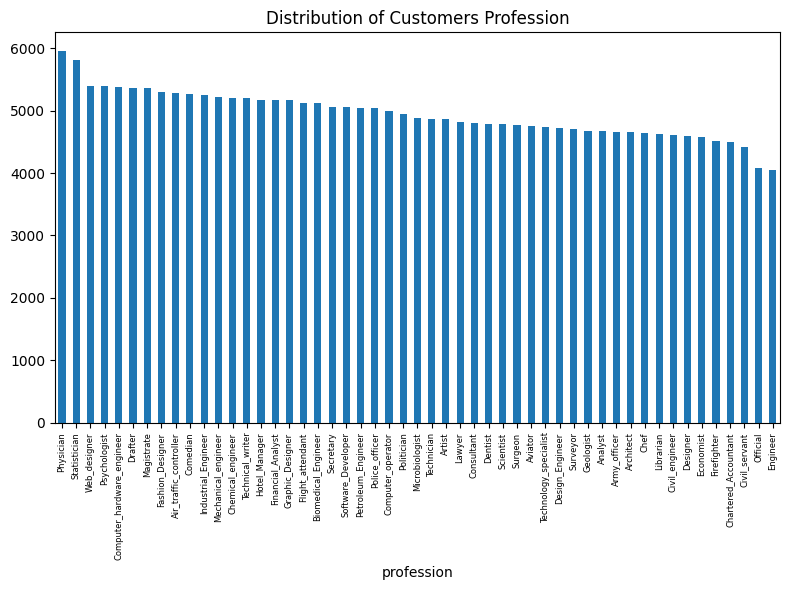

In [146]:
print(df['profession'].value_counts(), '\n')

plt.figure(figsize=(8,6))
df['profession'].value_counts().plot(kind='bar')
plt.title('Distribution of Customers Profession')

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()


Pelanggan berasal dari berbagai profesi dengan mayoritas memiliki berprofesi sebagai dokter dan statistikawan.

In [147]:
print('Jumlah profesi:', df['profession'].nunique())
print(df['profession'].unique())

Jumlah profesi: 51
['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']


Jumlah profesi pelanggan terdiri dari 51 profesi yang berbeda. Oleh karena itu, untuk keperluan analisis dan pemodelan, profesi-profesi ini akan dimapping atau dikelompokkan terlebih dahulu agar lebih mudah dianalisis dan digunakan dalam model machine learning. Pengelompokkan ini akan membantu dalam mengurangi kompleksitas data dan memberikan wawasan yang lebih jelas mengenai pengaruh profesi terhadap variabel target.

Engineering

- Mechanical engineer, Chemical engineer, Design Engineer, Biomedical Engineer, Computer hardware engineer, Petroleum Engineer, Engineer, Civil engineer, dan Industrial Engineer.

Technology and IT

- Software Developer, Computer operator, Web designer, Technology specialist, dan Analyst.

Design and Creative

- Technical writer, Designer, Graphic Designer, Fashion Designer, Architect, dan Artist.

Finance and Economics

- Financial Analyst, Economist, dan Chartered Accountant.

Medical and Health

- Physician, Dentist, Surgeon, Psychologist, dan Microbiologist.

Aviation and Transportation

- Flight attendant, Air traffic controller, dan Aviator.

Government and Public Service

- Civil servant, Politician, Lawyer, Police officer, Firefighter, Army officer, dan Magistrate.

Management and Administration

- Hotel Manager, Secretary, Consultant, dan Official.

Science and Research

- Scientist, Geologist, Statistician, Surveyor, dan Drafter.

Others

- Librarian, Comedian, Chef, dan Technician.

In [148]:
profession_grouped = df.groupby(['profession', 'risk_flag']).size().unstack(fill_value=0)
profession_percent = profession_grouped.div(profession_grouped.sum(axis=1), axis=0) * 100

profession_percent.sort_values(by=1, ascending=False).head()

risk_flag,0,1
profession,,
Police_officer,83.59,16.41
Chartered_Accountant,84.64,15.36
Army_officer,84.79,15.21
Surveyor,84.85,15.15
Software_Developer,85.16,14.84


Sebelum dikelompokkan, bisa kita ketahui berikut 5 profesi dengan proporsi dengan kemungkinan lebih besar untuk default dibandingkan profesi lainnya.

**City Features**

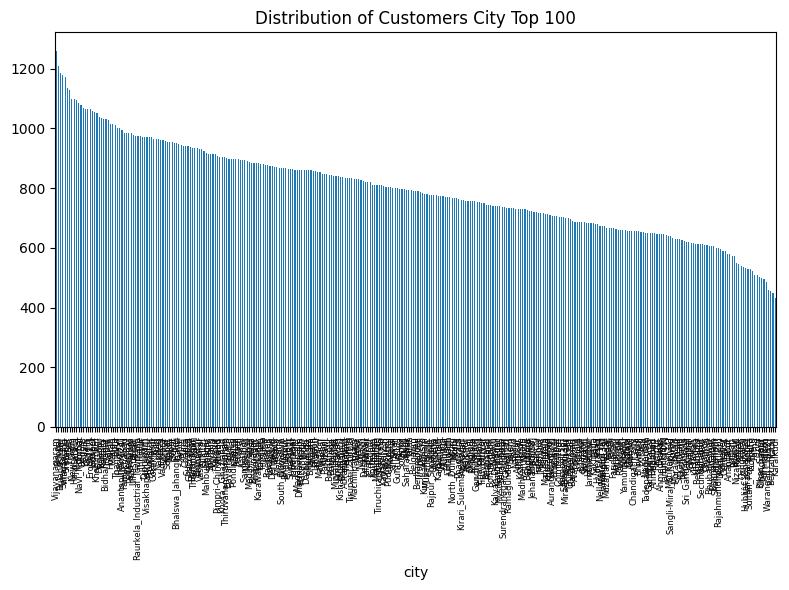

In [149]:
plt.figure(figsize=(8,6))
df['city'].value_counts().plot(kind='bar')
plt.title('Distribution of Customers City Top 100')

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()


Pelanggan berasal dari berbagai kota dengan mayoritas berasal dari Vijayanagaram.

In [150]:
print(df['city'].nunique())
print(df['city'].unique())

317
['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru[25]'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhik

In [151]:
city_grouped = df.groupby(['city', 'risk_flag']).size().unstack(fill_value=0)
city_percent = city_grouped.div(city_grouped.sum(axis=1), axis=0) * 100

city_percent.sort_values(by=1, ascending=False).head()

risk_flag,0,1
city,,
Bhubaneswar,67.38,32.62
Gwalior,72.73,27.27
Bettiah[33],73.30,26.70
Kochi,74.71,25.29
Raiganj,76.04,23.96


Sebelum dihapus, bisa kita ketahui berikut 5 kota dengan proporsi dengan kemungkinan lebih besar untuk default dibandingkan pelanggan berasal dari kota lainnya.

**State Features**

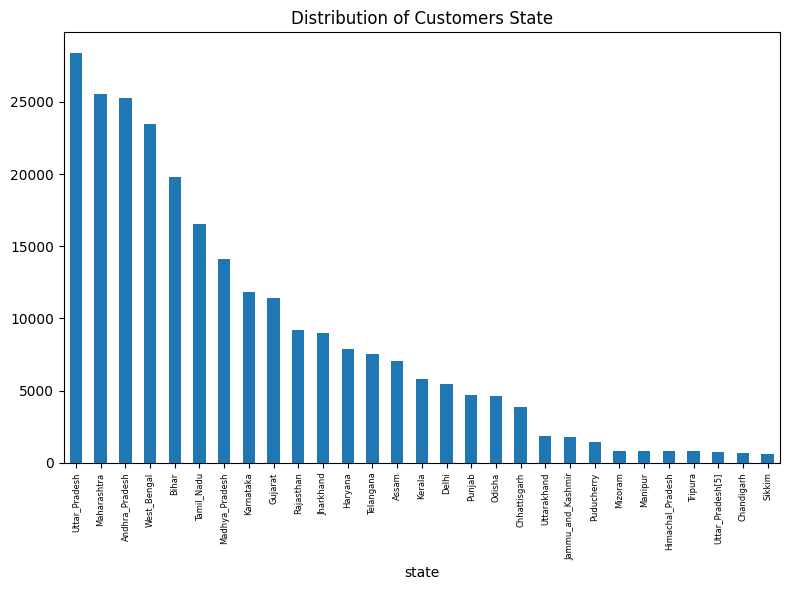

In [152]:
plt.figure(figsize=(8,6))
df['state'].value_counts().plot(kind='bar')
plt.title('Distribution of Customers State')

plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()


Pelanggan berasal dari berbagai wilayah dengan mayoritas pelanggan berasal dari Uttar Pradesh dan Maharashtra.

In [153]:
print(df['state'].nunique())
print(df['state'].unique())

29
['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']


Terdapat kesalahan penulisan pada Uttar_Pradesh[5], seharusnya menjadi Uttar_Pradesh, dan hanya terdapat 28 wilayah unik. Namun, dengan jumlah nilai unik yang masih cukup banyak yaitu 28, akan lebih baik untuk mengelompokkannya menjadi kelompok yang lebih kecil berdasarkan wilayah agar mempermudah proses pemodelan. Pengelompokkan ini akan membantu dalam mengurangi kompleksitas data dan memberikan wawasan yang lebih jelas mengenai pengaruh profesi terhadap variabel target.

**West Zone**

- Rajasthan, Maharashtra, dan Gujarat.

**South Zone**

- Andhra Pradesh, Kerala, Tamil Nadu, Puducherry, Telangana, dan Karnataka.

**North Zone**

- Jammu and Kashmir, Himachal Pradesh, Punjab, Chandigarh, Uttarakhand, Haryana, Delhi, dan Uttar Pradesh.

**East Zone**

- Bihar, West Bengal, Jharkhand, dan Odisha.

**Central Zone**

- Chhattisgarh dan Madhya Pradesh.

**North East Zone**

- Sikkim, Mizoram, Manipur, Tripura, dan Assam.

In [154]:
state_grouped = df.groupby(['state', 'risk_flag']).size().unstack(fill_value=0)
state_percent = state_grouped.div(state_grouped.sum(axis=1), axis=0) * 100

state_percent.sort_values(by=1, ascending=False).head()

risk_flag,0,1
state,,
Manipur,78.45,21.55
Tripura,83.19,16.81
Kerala,83.29,16.71
Jammu_and_Kashmir,84.10,15.90
Madhya_Pradesh,84.56,15.44


Sebelum dikelompokkan, bisa kita ketahui berikut 5 wilayah dengan proporsi dengan kemungkinan lebih besar untuk default dibandingkan pelanggan berasal dari wilayah lainnya.

## **Data Visialization - Correlation Features**

<Figure size 800x600 with 0 Axes>

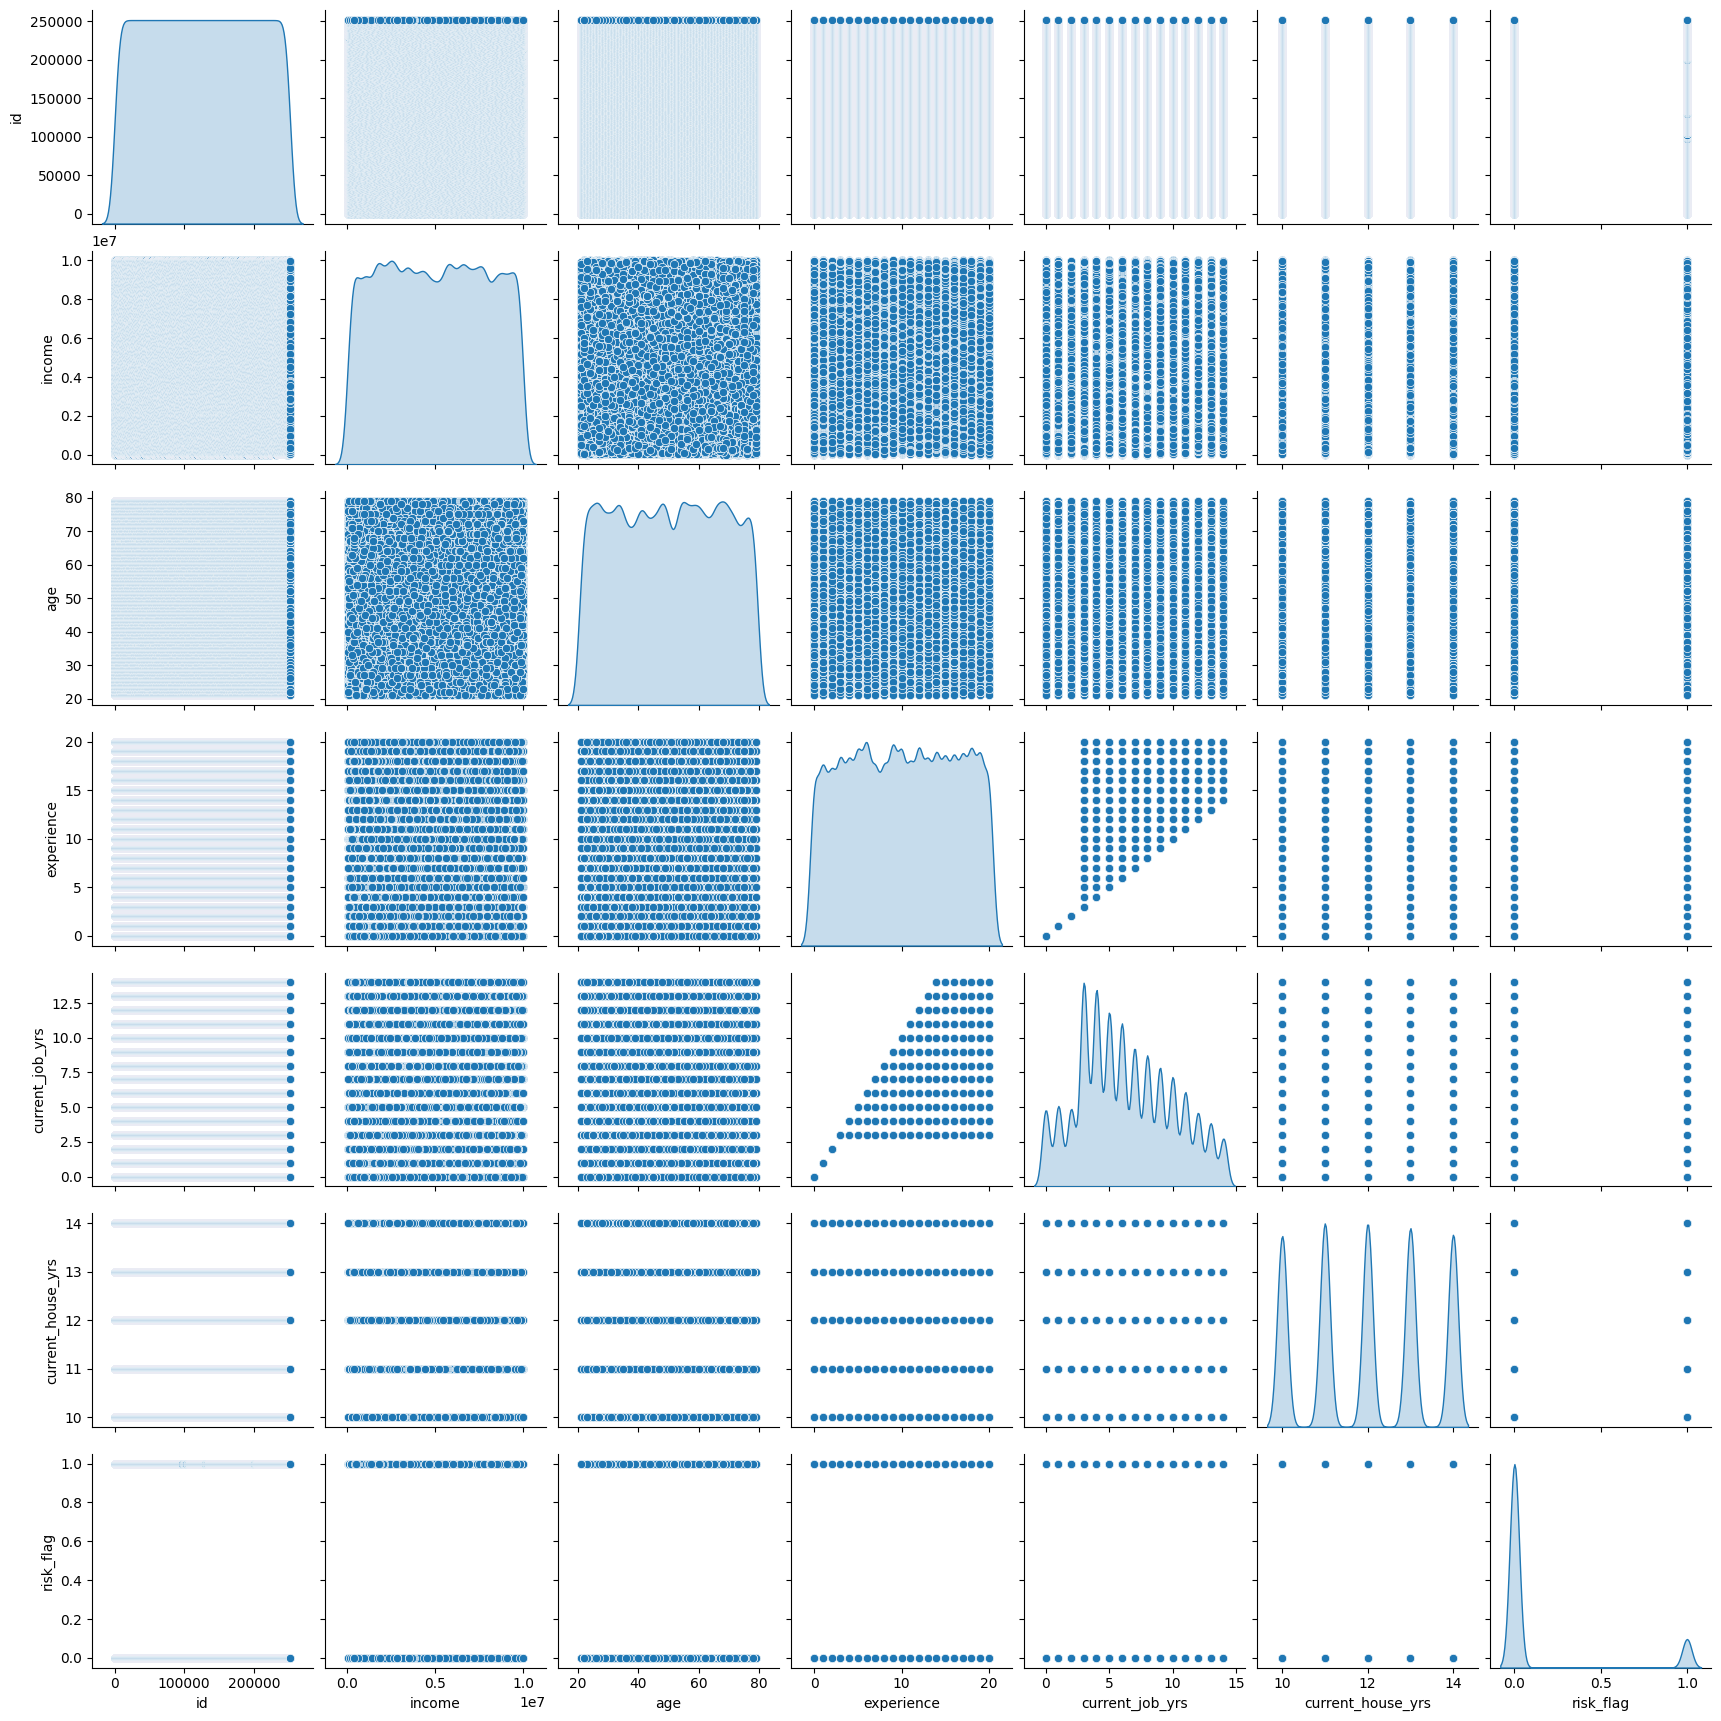

In [155]:
plt.figure(figsize=(8,6))
sns.pairplot(data=df, diag_kind='kde')

plt.show()

Tidak ditemukan pola yang menarik antar fitur terutama pada fitur target yaitu risk_flag.

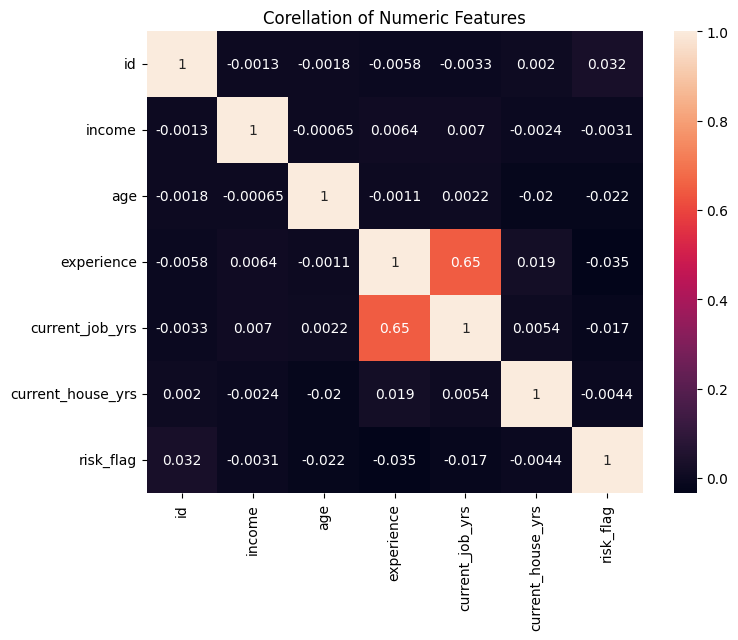

In [156]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Corellation of Numeric Features")

plt.show()

Berdasarkan correlation map, terlihat bahwa fitur target "risk_flag" tidak memiliki korelasi yang signifikan dengan fitur numerik lainnya. Namun, ada temuan menarik terkait dengan korelasi antara "experience" dan "current_job_yrs" yang mencapai 0.65, menunjukkan adanya korelasi yang cukup kuat di antara keduanya.

# **Data Prepartion**

1. Tidak terdapat nilai yang hilang, data yang diduplikasi, atau outlier, sehingga tidak diperlukan tindakan tambahan.
2. Ditemukan typo pada fitur state yaitu "Uttar_Pradesh[5]". Perlu diperbaiki menjadi "Uttar_Pradesh".
3. Profesi pelanggan akan dikelompokkan berdasarkan kemiripan antara profesi-profesi tersebut, membentuk kelompok profesi yang lebih kecil.
4. Wilayah pelanggan akan dikelompokkan berdasarkan zona wilayah, membentuk kelompok wilayah yang lebih kecil.
5. Fitur "id" akan dihapus karena tidak memberikan informasi yang relevan untuk analisis.
6. Fitur "city" akan dihapus karena memiliki banyak variasi nilai kategori (317 kategori), dan informasi tersebut telah diwakilkan dalam fitur "state". Dengan demikian, untuk menghindari redundansi, fitur "city" akan dihapus.
7. Encode fitur-fitur kategori seperti single/married, house_ownership, dan lainnya.

# **Data Cleaning**

### Replace Uttar_Pradesh[5] to Uttar_Pradesh

In [157]:
df['state'] = df['state'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')
df

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [158]:
print('Jumlah wilayah:', df['state'].nunique())
print(df['state'].unique())

Jumlah wilayah: 28
['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Manipur' 'Sikkim']


**Remove id dan City Features**

In [159]:
df.drop(columns= ['id', 'city'], axis=1, inplace=True)
df.head(10)

,income,age,experience,married/single,house_ownership,car_ownership,profession,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1
5,6915937,64,0,single,rented,no,Civil_servant,Maharashtra,0,12,0
6,3954973,58,14,married,rented,no,Librarian,Tamil_Nadu,8,12,0
7,1706172,33,2,single,rented,no,Economist,Gujarat,2,14,0
8,7566849,24,17,single,rented,yes,Flight_attendant,Rajasthan,11,11,0
9,8964846,23,12,single,rented,no,Architect,Telangana,5,13,0


## **Data Transformation**

**Mapping Profession Categories**

In [160]:
profession_categories= {"Mechanical_engineer": "Engineering", "Chemical_engineer": "Engineering",
    "Design_Engineer": "Engineering", "Biomedical_Engineer": "Engineering",
    "Computer_hardware_engineer": "Engineering", "Petroleum_Engineer": "Engineering",
    "Engineer": "Engineering", "Civil_engineer": "Engineering",
    "Industrial_Engineer": "Engineering", "Software_Developer": "Technology_and_IT",
    "Computer_operator": "Technology_and_IT", "Web_designer": "Technology_and_IT",
    "Technology_specialist": "Technology_and_IT", "Analyst": "Technology_and_IT",
    "Technical_writer": "Design_and_Creative", "Designer": "Design_and_Creative",
    "Graphic_Designer": "Design_and_Creative", "Fashion_Designer": "Design_and_Creative",
    "Architect": "Design_and_Creative", "Artist": "Design_and_Creative",
    "Financial_Analyst": "Finance_and_Economics", "Economist": "Finance_and_Economics",
    "Chartered_Accountant": "Finance_and_Economics", "Physician": "Medical_and_Health",
    "Dentist": "Medical_and_Health", "Surgeon": "Medical_and_Health",
    "Psychologist": "Medical_and_Health", "Microbiologist": "Medical_and_Health",
    "Flight_attendant": "Aviation_and_Transportation", "Air_traffic_controller": "Aviation_and_Transportation",
    "Aviator": "Aviation_and_Transportation", "Civil_servant": "Government_and_Public_Service",
    "Politician": "Government_and_Public_Service", "Lawyer": "Government_and_Public_Service",
    "Police_officer": "Government_and_Public_Service", "Firefighter": "Government_and_Public_Service",
    "Army_officer": "Government_and_Public_Service", "Magistrate": "Government_and_Public_Service",
    "Hotel_Manager": "Management_and_Administration", "Secretary": "Management_and_Administration",
    "Consultant": "Management_and_Administration", "Official": "Management_and_Administration",
    "Scientist": "Science_and_Research", "Geologist": "Science_and_Research",
    "Statistician": "Science_and_Research", "Surveyor": "Science_and_Research",
    "Drafter": "Science_and_Research", "Librarian": "Others",
    "Comedian": "Others", "Chef": "Others", "Technician": "Others"
}

df['profession'] = df['profession'].map(profession_categories)

In [161]:
df['profession'].unique()

array(['Engineering', 'Technology_and_IT', 'Design_and_Creative',
       'Government_and_Public_Service', 'Others', 'Finance_and_Economics',
       'Aviation_and_Transportation', 'Medical_and_Health',
       'Science_and_Research', 'Management_and_Administration'],
      dtype=object)

**Mapping State to Zone**

In [35]:
state_zone = {
    'Rajasthan':'West_Zone', 'Maharashtra':'West_Zone',
    'Gujarat':'West_Zone', 'Andhra_Pradesh':'South_Zone',
    'Kerala':'South_Zone', 'Tamil_Nadu':'South_Zone',
    'Puducherry':'South_Zone', 'Telangana':'South_Zone',
    'Karnataka':'South_Zone', 'Jammu_and_Kashmir':'North_Zone',
    'Himachal_Pradesh':'North_Zone', 'Punjab':'North_Zone',
    'Chandigarh':'North_Zone', 'Uttarakhand':'North_Zone',
    'Haryana':'North_Zone', 'Delhi':'North_Zone',
    'Uttar_Pradesh':'North_Zone', 'Bihar':'East_Zone',
    'West_Bengal':'East_Zone', 'Jharkhand':'East_Zone',
    'Odisha':'East_Zone', 'Chhattisgarh':'Central_Zone',
    'Madhya_Pradesh':'Central_Zone', 'Sikkim':'North_East_Zone',
    'Mizoram':'North_East_Zone', 'Manipur':'North_East_Zone',
    'Tripura':'North_East_Zone', 'Assam':'North_East_Zone'}

df['state'] = df['state'].map(state_zone)

In [36]:
df['state'].unique()

array(['Central_Zone', 'West_Zone', 'South_Zone', 'East_Zone',
       'North_Zone', 'North_East_Zone'], dtype=object)

# **Features Selection**

**Statistical Testing for Categorical Features**

In [162]:
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.tools.tools import add_constant

In [163]:
df_test = pd.DataFrame(columns=['column', 'statistic', 'pvalue'])

In [164]:
bins = [0, 2500000, 5000000, 7500000, 10000000]
labels = ['low', 'medium', 'high', 'very high']

df['income_category'] = pd.cut(df['income'], bins=bins, labels=labels)

In [165]:
def contingency_table(index, column, data = df):
  observed = []
  contingency_table = pd.pivot_table(data=data, index=index,columns=column, aggfunc='size')
  contingency_table.columns.name = None

  default_customers = contingency_table.loc[1].to_list()
  observed.append(default_customers)

  non_default_customers = contingency_table.loc[0].to_list()
  observed.append(non_default_customers)

  return observed

In [166]:
alpha = 0.05
categorical_col = df.select_dtypes(['object', 'category']).columns

for col in categorical_col:
  obs = contingency_table('risk_flag', col)
  rest = chi2_contingency(obs)
  new_assign = pd.DataFrame({'column':[col], 'p_value':[rest.pvalue]})
  df_test = pd.concat([df_test, new_assign], ignore_index=True)
  print(col)
  print(rest.pvalue)

  if rest.pvalue < 0.05:
    print('Ada cukup bukti tolak hipotesis nol')
    print(f'Terdapat hubungan yang signifikan antara {col} dan Risk Flag \n')
  else:
    print('Tidak ada cukup bukti, gagal tolak hipotesis nol')
    print(f'Tidak terdapat hubungan yang signifikan antara {col} dan Risk Flag \n')

married/single
3.773053705715196e-26
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara married/single dan Risk Flag 

house_ownership
1.8381930028370595e-40
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara house_ownership dan Risk Flag 

car_ownership
1.7350853850183995e-33
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara car_ownership dan Risk Flag 

profession
1.902749594154827e-23
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara profession dan Risk Flag 

state
6.498323341161967e-137
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara state dan Risk Flag 

income_category
4.47261306962424e-09
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara income_category dan Risk Flag 



**Statistical Testing for Numerical Features**

In [167]:
alpha = 0.05
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_col:
  if col != 'risk_flag':
    group1 = df[df['risk_flag'] == df['risk_flag'].unique()[0]][col]
    group2 = df[df['risk_flag'] == df['risk_flag'].unique()[1]][col]
    t_stat, p_value = ttest_ind(group1, group2)
    new_assign = pd.DataFrame({'column':[col],'p_value':[p_value]})
    df_test = pd.concat([df_test, new_assign], ignore_index=True)
    print(col)
    print(p_value)

    if p_value < 0.05:
        print('Ada cukup bukti tolak hipotesis nol')
        print(f'Terdapat hubungan yang signifikan antara {col} dan risk_flag \n')
    else:
        print('Tidak ada cukup bukti, gagal tolak hipotesis nol')
        print(f'Tidak terdapat hubungan yang signifikan antara {col} dan risk_flag \n')

income
0.1207220319451374
Tidak ada cukup bukti, gagal tolak hipotesis nol
Tidak terdapat hubungan yang signifikan antara income dan risk_flag 

age
6.687623646851126e-28
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara age dan risk_flag 

experience
2.5475634862877598e-67
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara experience dan risk_flag 

current_job_yrs
1.8132212230985212e-17
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara current_job_yrs dan risk_flag 

current_house_yrs
0.02806947277161835
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara current_house_yrs dan risk_flag 



In [168]:
df_test.sort_values(by= 'p_value', ascending= True)

,column,statistic,pvalue,p_value
4,state,NaN,NaN,0.00
8,experience,NaN,NaN,0.00
1,house_ownership,NaN,NaN,0.00
2,car_ownership,NaN,NaN,0.00
7,age,NaN,NaN,0.00
0,married/single,NaN,NaN,0.00
3,profession,NaN,NaN,0.00
9,current_job_yrs,NaN,NaN,0.00
5,income_category,NaN,NaN,0.00
10,current_house_yrs,NaN,NaN,0.03


Berdasarkan hasil uji chi-squared dan uji t diperoleh beberapa fitur yang ada bukti secara statistik memiliki hubungan dengan fitur target risk_flag yaitu diantaranya adalah experience, state, house_ownership, car_ownership, age, married/single, profession, current_job_yrs, current_house_yrs, dan income_category. Oleh karena itu, fitur-fitur tersebut akan digunakan dalam feature selection untuk nanti digunakan pada tahap modelling. Sebelum itu, akan dilakukan pengecekan multikolinearitas untuk memastikan tidak ada hubungan linear yang kuat antara fitur-fitur independen tersebut.

In [169]:
features = df_test[df_test['p_value'] < 0.05]['column'].to_list()
features.append('risk_flag')

df_new = df[features]
df_new.sample(5)

,married/single,house_ownership,car_ownership,profession,state,income_category,age,experience,current_job_yrs,current_house_yrs,risk_flag
30421,single,rented,no,Management_and_Administration,Karnataka,very high,70,6,5,10,0
127057,married,rented,no,Science_and_Research,Haryana,medium,51,15,13,14,0
40946,single,rented,no,Government_and_Public_Service,Uttar_Pradesh,high,58,10,4,10,0
128016,single,rented,no,Engineering,Maharashtra,high,41,9,9,11,0
128163,single,rented,yes,Design_and_Creative,Chhattisgarh,medium,57,4,4,11,0


**Categorical Encoding**

In [170]:
df_new[df_new.select_dtypes(['object', 'category']).columns]

,married/single,house_ownership,car_ownership,profession,state,income_category
0,single,rented,no,Engineering,Madhya_Pradesh,low
1,single,rented,no,Technology_and_IT,Maharashtra,very high
2,married,rented,no,Design_and_Creative,Kerala,medium
3,single,rented,yes,Technology_and_IT,Odisha,high
4,single,rented,no,Government_and_Public_Service,Tamil_Nadu,high
...,...,...,...,...,...,...
251995,single,rented,no,Medical_and_Health,West_Bengal,very high
251996,single,rented,no,Government_and_Public_Service,Madhya_Pradesh,medium
251997,single,rented,no,Engineering,Maharashtra,medium
251998,single,rented,no,Design_and_Creative,Puducherry,high


Akan dilakukan beberapa teknik categorical encode untuk fitur-fitur kategori yaitu:

**Ordinal Encoding**: married/single, car_ownership, income_category

- **Alasan**: Kategori memiliki urutan jelas:
- married/single: Status pernikahan
- car_ownership: Kepemilikan mobil ('yes' > 'no')
- income_category: Tingkatan pendapatan ('low' < 'medium' < 'high' < 'very high')

**Frequency Encoding**: profession, state

- **Alasan**: Menghindari sparsity dengan banyak kategori:
- profession: 10 kategori
- state: 6 kategori

**One-Hot Encoding**: house_ownership

- **Alasan**: Jumlah kategori kecil (3) tanpa urutan:
- house_ownership: 'own', 'noown_norent', 'rent'

In [171]:
df_new.loc[:, 'married/single'] = df_new.loc[:, 'married/single'].map({'married':1, 'single':0})
df_new.loc[:, 'car_ownership'] = df_new.loc[:, 'car_ownership'].map({'yes':1, 'no':0})
df_new.loc[:, 'income_category'] = df_new.loc[:, 'income_category'].map({'low':0, 'medium':1, 'high':2, 'very high':3})

In [172]:
frequency_profession = df_new['profession'].value_counts().to_dict()
frequency_state = df_new['state'].value_counts().to_dict()

df_new.loc[:, 'profession'] = df_new['profession'].map(frequency_profession) / len(df_new)
df_new.loc[:, 'state'] = df_new['state'].map(frequency_state) / len(df_new)

In [173]:
df_new = pd.get_dummies(df_new, columns=['house_ownership'], drop_first=True)

In [174]:
cat_col = ['married/single', 'car_ownership',
           'income_category', 'profession',
           'state', 'house_ownership_owned',
           'house_ownership_rented']

df_new[cat_col] = df_new[cat_col].astype(float)
df_new.head()

,married/single,car_ownership,profession,state,income_category,age,experience,current_job_yrs,current_house_yrs,risk_flag,house_ownership_owned,house_ownership_rented
0,0.00,0.00,0.18,0.06,0.00,23,3,3,13,0,0.00,1.00
1,0.00,0.00,0.10,0.10,3.00,40,10,9,13,0,0.00,1.00
2,1.00,0.00,0.12,0.02,1.00,66,4,4,10,0,0.00,1.00
3,0.00,1.00,0.10,0.02,2.00,41,2,2,12,1,0.00,1.00
4,0.00,0.00,0.13,0.07,2.00,47,11,3,14,1,0.00,1.00


### **Uji Multikolinearitas**

**VIF Calculation**

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding a constant column to the dataframe
X = add_constant(df_new)

# Creating a DataFrame to store VIF values
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF values
print(vif)

                  Features    vif
0                    const 136.74
1           married/single   1.00
2            car_ownership   1.00
3               profession   1.00
4                    state   1.00
5          income_category   1.00
6                      age   1.00
7               experience   1.72
8          current_job_yrs   1.72
9        current_house_yrs   1.00
10               risk_flag   1.00
11   house_ownership_owned   2.66
12  house_ownership_rented   2.66


Tidak ada multikolinearitas yang serius dengan semua fitur memiliki VIF di bawah 5. Selain itu, Fitur aman digunakan dalam model dan dapat digunakan tanpa masalah multikolinearitas.

- const: VIF sangat tinggi (145.47) – diharapkan untuk konstanta.
- married/single (1.001936), car_ownership (1.000873), profession (1.000630), state (1.001363), - income_category (1.000540), age (1.001511), current_house_yrs (1.001311), risk_flag (1.003970):
  - VIF mendekati 1, menunjukkan tidak ada multikolinearitas.
- experience (1.719523) dan - current_job_yrs (1.717295):
  - VIF menunjukkan korelasi moderat, tetapi masih dapat diterima.
- house_ownership_owned (2.656826) dan
- house_ownership_rented (2.657312):
VIF menunjukkan korelasi moderat.

# **Train Test Split**

In [176]:
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

In [178]:
X = df_new.drop(columns=['risk_flag'], axis =1)
y = df_new['risk_flag']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split (X_train_val, y_train_val, test_size = 0.2, random_state =42)

In [179]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in train dataset: {len(X_val)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 252000
Total # of sample in train dataset: 181440
Total # of sample in train dataset: 45360
Total # of sample in test dataset: 25200


# **Imbalance Dataset**

In [180]:
y_train.value_counts()

,count
risk_flag,
0,159173
1,22267


Diketahui bahwa pada fitur target terdapat ketimpangan yang besar dalam dataset, yaitu antara pelanggan yang pernah mengalami gagal bayar (default) dan pelanggan yang tidak pernah gagal bayar (non-default). Berdasarkan data, jumlah pelanggan yang pernah gagal bayar lebih sedikit, sehingga termasuk dalam kategori minority class. Oleh karena itu, perlu dilakukan oversampling dengan menambahkan data sintetis untuk minority class atau melakukan undersampling dengan mengurangi data majority class agar data menjadi seimbang.

In [181]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

risk_flag
0    159173
1    159173
Name: count, dtype: int64


Dilakukan oversampling menggunakan metode SMOTE (Synthetic Minority Oversampling TEchnique). Metode ini bekerja dengan cara memilih sampel yang dekat dengan ruang fitur, menggambar garis di antara sampel dalam ruang fitur, dan menggambar sampel baru pada titik di sepanjang garis tersebut. SMOTE membantu dalam menciptakan data sintetis untuk minority class sehingga mengimbangi jumlah sampel antara kelas mayoritas dan kelas minoritas dalam dataset.

# **Modelling**

**Training Model**

Pada tahap ini, kita akan mengembangkan model machine learning dengan base model Decision Tree (default parameter) yang kemudian dilakukan evaluasi untuk melihat perbandingan untuk evaluasi data train dan validasi. Setelah itu, dilakukan proses tunning hyperparameter untuk menemukan best parameter untuk model decision tree.

In [182]:
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [183]:
model = DecisionTreeClassifier(random_state=42)

model_name = type(model).__name__ + ' - Train'
df_model = pd.DataFrame()
model.fit(X_train_smote, y_train_smote)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(model, X_train_smote, y_train_smote, cv=5, scoring=scoring)

# evaluation training
df_model.loc[model_name, 'accuracy'] = cv_results['test_accuracy'].mean()
df_model.loc[model_name, 'precision'] = cv_results['test_precision'].mean()
df_model.loc[model_name, 'recall'] = cv_results['test_recall'].mean()
df_model.loc[model_name, 'f1_score'] = cv_results['test_f1'].mean()
df_model.loc[model_name, 'roc_auc_score'] = cv_results['test_roc_auc'].mean()

In [184]:
print('Accuracy:', df_model['accuracy'][0])
print('Precision:', df_model['precision'][0])
print('Recall:', df_model['recall'][0])
print('F1 Score', df_model['f1_score'][0])
print('ROC AUC Score:', df_model['roc_auc_score'][0])

Accuracy: 0.9229895639559377
Precision: 0.8900485428485417
Recall: 0.9652581816784591
F1 Score 0.9256684465018971
ROC AUC Score: 0.9277186319490675


In [185]:
model_name = type(model).__name__ + ' - Validation'
y_pred = model.predict(X_val)

# evaluation testing
df_model.loc[model_name, 'accuracy'] = accuracy_score(y_val, y_pred)
df_model.loc[model_name, 'precision'] = precision_score(y_val, y_pred)
df_model.loc[model_name, 'recall'] = recall_score(y_val, y_pred)
df_model.loc[model_name, 'f1_score'] = f1_score(y_val, y_pred)
df_model.loc[model_name, 'roc_auc_score'] = roc_auc_score(y_val, model.predict_proba(X_val)[:,1])

In [186]:
df_model

,accuracy,precision,recall,f1_score,roc_auc_score
DecisionTreeClassifier - Train,0.92,0.89,0.97,0.93,0.93
DecisionTreeClassifier - Validation,0.87,0.49,0.82,0.61,0.85


Selisih untuk metrik evaluasi antara train dan validasi tidak terdapat perbedaan yang signifikan terutama untuk metrik accuracy dan roc_auc_score yang tidak mengindikasikan overfitting.

# **Hyperparameter Tuning**

In [187]:
def best_thresholds(y_test, y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = 2 * recall * precision / (recall + precision)
    best_threshold = thresholds[np.argmax(f1_scores)]

    return best_threshold

In [188]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}

model = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

Ini menunjukkan bahwa parameter terbaik yang ditemukan oleh RandomizedSearchCV adalah:

- criterion = entropy
- min_samples_leaf = 4
- min_samples_split = 5
- random_state=42

In [189]:
model_name = type(best_model).__name__ + ' - Best Model Validation'

y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
best_threshold = best_thresholds(y_val, y_val_pred_proba)
print(f'Best Threshold: {best_threshold:.2f}')

y_pred = (y_val_pred_proba >= best_threshold).astype(int)

# evaluation validation of best model
df_model.loc[model_name, 'accuracy'] = accuracy_score(y_val, y_pred)
df_model.loc[model_name, 'precision'] = precision_score(y_val, y_pred)
df_model.loc[model_name, 'recall'] = recall_score(y_val, y_pred)
df_model.loc[model_name, 'f1_score'] = f1_score(y_val, y_pred)
df_model.loc[model_name, 'roc_auc_score'] = roc_auc_score(y_val, best_model.predict_proba(X_val)[:,1])

Best Threshold: 0.26


In [190]:
df_model

,accuracy,precision,recall,f1_score,roc_auc_score
DecisionTreeClassifier - Train,0.92,0.89,0.97,0.93,0.93
DecisionTreeClassifier - Validation,0.87,0.49,0.82,0.61,0.85
DecisionTreeClassifier - Best Model Validation,0.87,0.49,0.81,0.61,0.86


Dengan menggunakan best parameter hasil tunning diperoleh metrik evaluasi yang lebih baik dari sebelumnya untuk data validasi. Selanjutnya, akan dilakukan evaluasi model dengan data testing.

# **Evaluation**

In [191]:
model_name = type(best_model).__name__ + ' - Best Model Test'
best_model.fit(X_train_val, y_train_val)

# Evaluasi model akhir dengan test set menggunakan threshold yang disesuaikan
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
best_threshold =  best_thresholds(y_test, y_test_pred_proba)

print(f'Best Threshold: {best_threshold:.2f}')

y_test_pred = (y_test_pred_proba >= best_threshold).astype(int)

# evaluation testing
df_model.loc[model_name, 'accuracy'] = accuracy_score(y_test, y_test_pred)
df_model.loc[model_name, 'precision'] = precision_score(y_test, y_test_pred)
df_model.loc[model_name, 'recall'] = recall_score(y_test, y_test_pred)
df_model.loc[model_name, 'f1_score'] = f1_score(y_test, y_test_pred)
df_model.loc[model_name, 'roc_auc_score'] = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])

Best Threshold: 0.25


In [192]:
df_model

,accuracy,precision,recall,f1_score,roc_auc_score
DecisionTreeClassifier - Train,0.92,0.89,0.97,0.93,0.93
DecisionTreeClassifier - Validation,0.87,0.49,0.82,0.61,0.85
DecisionTreeClassifier - Best Model Validation,0.87,0.49,0.81,0.61,0.86
DecisionTreeClassifier - Best Model Test,0.87,0.49,0.83,0.61,0.86


Berdasarkan evaluation model, diperoleh model berhasil untuk memprediksi dengan akurasi 87%.

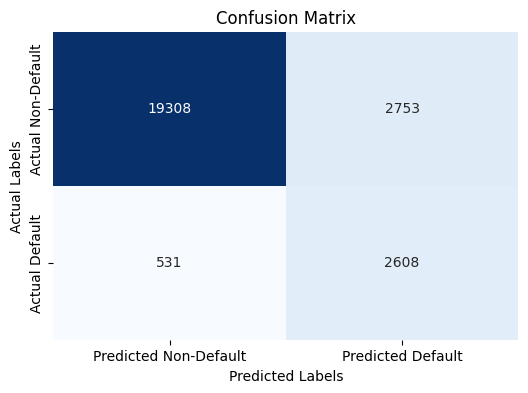

In [193]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'])

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

Perhatikan matriks kebingungan di atas, dapat diketahui bahwa angka repayment rate dengan implementasi model adalah:

repayment_rate = 19308/19308+531 = 97.3%

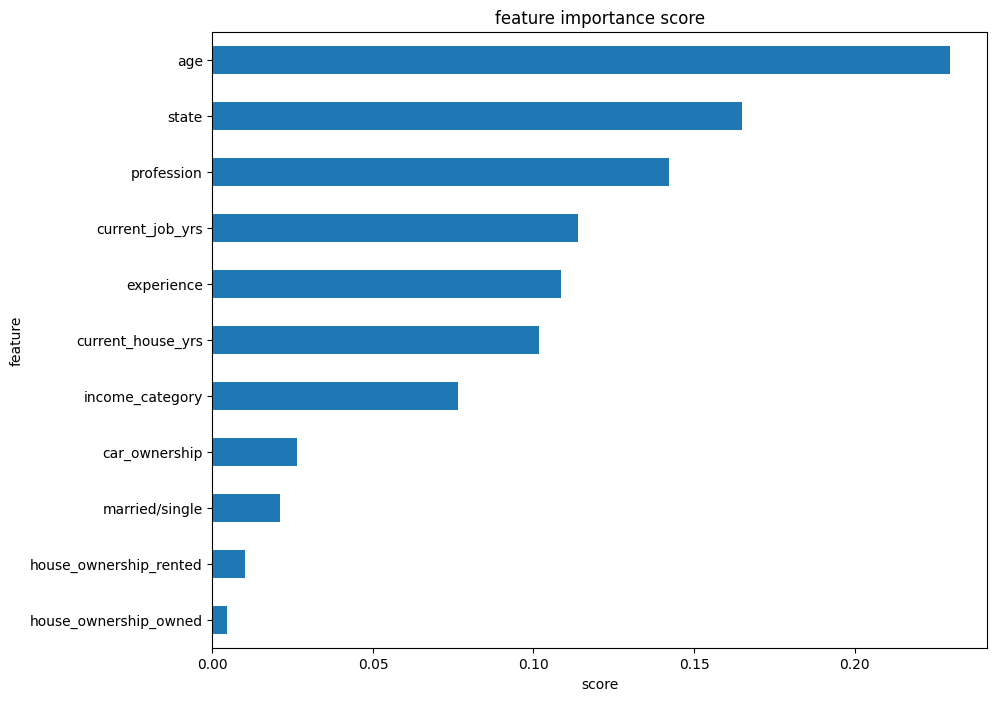

In [194]:
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

Berdasarkan feature importance score diperoleh bahwa fitur-fitur age, state, dan profession merupakan 3 fitur yang memiliki pengaruh terbesar terhadap fitur target.

# **Convert Credit Scoring**

Selanjutnya, dengan mengetahui probabilitas dari prediksi apakah pelanggan akan gagal bayar (default) atau tidak (non-default) maka dapat dikonversi untuk menjadi skor kredit untuk mengklasifikasikan pelanggan sebagai good borrower atau bad borrower.

In [195]:
def score_credit_generate(probs, min=250, max=900):
  min_score = min
  max_score = max
  scaler = MinMaxScaler(feature_range=(min_score, max_score))
  credit_scores = scaler.fit_transform(1 - probs.reshape(-1, 1)).flatten()

  return credit_scores

In [196]:
credit_scores = score_credit_generate(y_test_pred_proba, min=300, max=800)

# Display results
results = pd.DataFrame({
    'Prediction': y_test_pred,
    'Probability of Default': y_test_pred_proba,
    'Credit Score': credit_scores,
    'Actual': y_test
})

results.sample(5)

,Prediction,Probability of Default,Credit Score,Actual
35156,1,0.25,675.00,0
40331,0,0.00,800.00,0
68989,0,0.00,800.00,0
165947,0,0.00,800.00,0
56226,1,0.76,421.21,0


In [197]:
results[results['Prediction']==0].sort_values(by='Credit Score').head()

,Prediction,Probability of Default,Credit Score,Actual
176053,0,0.24,681.58,0
116058,0,0.24,682.35,0
164567,0,0.24,682.35,0
8031,0,0.24,682.35,0
106011,0,0.23,683.33,0


Berikut adalah kriteria yang dapat digunakan untuk mengelompokkan skor kredit lebih lanjut:

- **Excellent (750-800)**: Sangat rendah risiko default.
- **Very Good (700-749)**: Rendah risiko default.
- **Good (650-699)**: Dianggap sebagai good borrower, moderat risiko default.
- **Fair (600-649)**: Sedikit lebih berisiko.
- **Poor (300-599)**: Tinggi risiko default.

# **Kesimpulan**

**Hasil analisis perilaku pelanggan:**

**Profesi dengan Proporsi Gagal Bayar Tertinggi:**

- Police Officer:
- Chartered Accountant:
- Army Officer:
- Surveyor:
- Software Developer:

**Usia:** Pelanggan yang lebih muda cenderung lebih berisiko gagal bayar dibandingkan yang lebih tua.

**Pengalaman Kerja:** Pengalaman kerja yang lebih lama mengurangi risiko gagal bayar. Semakin senior, semakin kecil kemungkinan default.

**Uji Statistik:** Nilai p_value yang sangat kecil menunjukkan hubungan signifikan antara fitur-fitur independen dan target.

**Peningkatan Angka Repayment Rate:**

- Repayment Rate (Tanpa model prediktif): 87%
- Repayment Rate (Dengan model prediktif): 96%
- Peningkatan: 9% (lebih dari target 5%) atau mencapai 95%

**Efisiensi Proses Penilaian Kredit:**

Dengan model prediktif, skor kredit dikonversi menjadi kriteria: Poor, Fair, Good, Very Good, dan Excellent. Proses persetujuan otomatis untuk kriteria Poor, Good, Very Good, dan Excellent, sementara kriteria Fair dinilai manual. Waktu persetujuan pinjaman berkurang dari 7 hari menjadi kurang dari 24 jam.

**Peningkatan Kepuasan Pelanggan:**

Dengan persetujuan pinjaman yang lebih cepat dan akurat, kepuasan pelanggan diperkirakan meningkat sebesar 10% dalam enam bulan.